In [1]:
#Data Manipulation Libraries
import numpy as np 
import pandas as pd 
import re #regular expressions
#Progress bar
from tqdm import tqdm
from datetime import datetime
#Read Images
import os
from skimage import io
from PIL import Image
import cv2 

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Modelling
import tensorflow as tf
import sys
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.models import Model
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import  r2_score,roc_auc_score,f1_score,recall_score,precision_score,classification_report, confusion_matrix,log_loss
import random

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
%cd '/gdrive/My Drive/'

/gdrive/My Drive


In [3]:
#Defining the image path to the Train, Test and Valid folders
image_path = '/gdrive/My Drive/data/'
os.listdir(image_path)

['Test', 'Train', 'Valid']

In [6]:
# How many images in directories
categories = ['Train']
animals = ['elephant', 'zebra']

for category in categories:
    for animal in animals:
        full_image_path = image_path +  category + "/" + animal + '/'
    
        print(category,animal,len(os.listdir(full_image_path)))

Train elephant 5010
Train zebra 5010


In [ ]:
# How many images in directories
categories = ['Test', 'Valid']

for category in categories:
    full_image_path = image_path +  category + "/" 
    
    print(category,len(os.listdir(full_image_path)))

Test 2000
Valid 2000


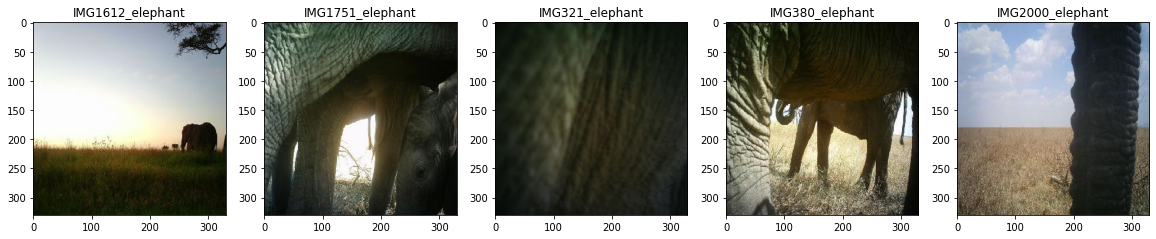

In [ ]:
#Plotting 5 random pitures from the elephant folder of the train set
plt.figure(figsize=(20,20))
train_folder_elephant= image_path + 'Train' + '/' + 'elephant'
for i in range(5):
    file = random.choice(os.listdir(train_folder_elephant))
    new_image_path= os.path.join(train_folder_elephant, file)
    img=plt.imread(new_image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

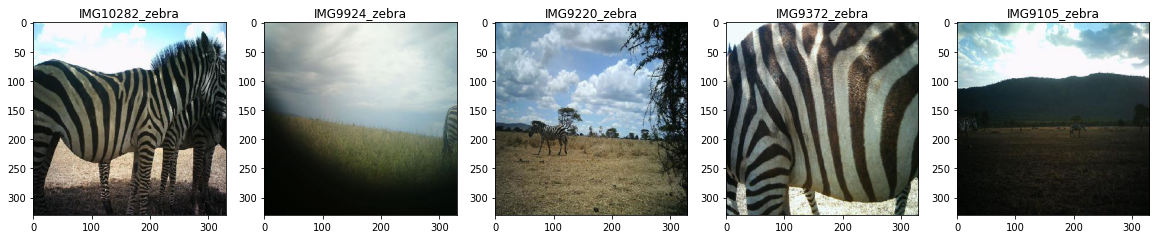

In [ ]:
#Plotting 5 random pitures from the zebra folder of the train set
plt.figure(figsize=(20,20))
train_folder_zebra= image_path + 'Train' + '/' +'zebra'
for i in range(5):
    file = random.choice(os.listdir(train_folder_zebra))
    zebra_image_path= os.path.join(train_folder_zebra, file)
    img=plt.imread(zebra_image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
print(len(os.listdir(train_folder_elephant)))
print(train_folder_elephant)

5010
/gdrive/My Drive/data/Train/elephant


In [5]:
#Image dimensions for printing
img_width=200
img_height=200
img_folder=image_path + 'Train' 

def create_dataset(img_folder): #defining a function that will create the datasets img_data (list of scaled data) and class_names (target labels)
   
    img_data_array=[]
    class_name=[]
    
    for dir1 in os.listdir(img_folder):
        print("Collecting images for: ",dir1)
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, 
                              cv2.COLOR_BGR2RGB) #cv2.imread loads the image from the image path
                                                 #cv2.COLOR_BGR2RGB reads images in BGR colourspace ordering and converts it back to RGB 
            try:
                image=cv2.resize(image, (img_height, img_width),interpolation = cv2.INTER_AREA) #cv2.INTER_AREA resizes the image by shrinking it
                image
            except:
                break
            image=np.array(image)
            image = image.astype('float32') #Ensures that the tensors are read as float values
            image /= 255 #normalising the input so that values are scaled between 0 and 1
            
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name = create_dataset(image_path + 'Train')

In [6]:
print(len(img_data))
print(len(class_name))

6094
6094


In [7]:
img_data = np.array(img_data) #converting img_datalist into a numpy array

In [8]:
def elephant_zebra_mapping(a): #converting the target labels into binary values
    if a=="elephant":
        return 1
    else:return 0
class_name=list(map(elephant_zebra_mapping,class_name))
class_name=np.array(class_name)
print(class_name)

[1 1 1 ... 0 0 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Countplot displaying the number of elephant and zebra images in the train dataset')

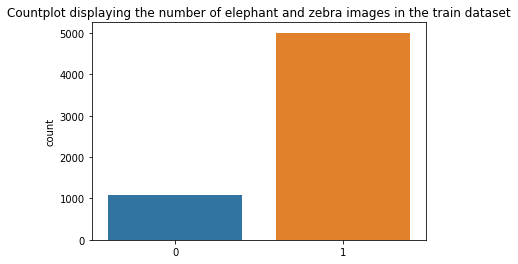

In [10]:
#displaying the number of target images in the train set
g = sns.countplot(class_name)
g.set_title('Countplot displaying the number of elephant and zebra images in the train dataset')

This countplot reveals that the loaded dataset is not balanced. There are various solutions that can be used to balance the data such as over or under sampling to reduce overfitting.

## Baseline CNN module

3 layer CNN and relu activation

In [32]:
def model():
    model=Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=(200,200,3),activation='relu'))
    model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2)) #20% dropout means that 20% of layer outputs are ignored to prevent overfitting
    model.add(Dense(1,activation='sigmoid'))
    
    return model

In [10]:
model = model()
#epochs = [10, 15, 20]
#for e in epochs:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=img_data,y=class_name, epochs=10)

Epoch 1/10
191/191 [==============================] - 33s 106ms/step - loss: 0.3674 - accuracy: 0.8750
Epoch 2/10
191/191 [==============================] - 20s 103ms/step - loss: 0.1739 - accuracy: 0.9355
Epoch 3/10
191/191 [==============================] - 20s 103ms/step - loss: 0.1197 - accuracy: 0.9577
Epoch 4/10
191/191 [==============================] - 20s 104ms/step - loss: 0.0828 - accuracy: 0.9673
Epoch 5/10
191/191 [==============================] - 20s 105ms/step - loss: 0.0527 - accuracy: 0.9815
Epoch 6/10
191/191 [==============================] - 20s 104ms/step - loss: 0.0488 - accuracy: 0.9826
Epoch 7/10
191/191 [==============================] - 20s 105ms/step - loss: 0.0337 - accuracy: 0.9883
Epoch 8/10
191/191 [==============================] - 20s 105ms/step - loss: 0.0289 - accuracy: 0.9888
Epoch 9/10
191/191 [==============================] - 20s 105ms/step - loss: 0.0309 - accuracy: 0.9911
Epoch 10/10
191/191 [==============================] - 21s 108ms/step - l

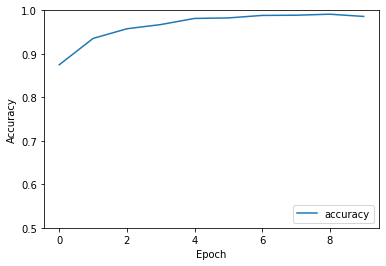

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [10]:
valid_data, valid_class_name = create_dataset(image_path + 'Valid')

In [46]:
model = model()
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

history = model.fit(valid_data, valid_class_name, epochs=10)

ValueError: ignored

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    plt.savefig(filename + '_plot.png')
    plt.close()
    
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    print("Define Model")
    global model 
    model = model()
    # create data generator
    print("Creating Image Data Generator")
    datagen_train = ImageDataGenerator(rescale=1.0/255.0,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True) #The photos in the training set will be augmented with 10% horizontal shifts and 10% vertical shifts as well as a horizontal flip to create a mirror image of the phot
    datagen_valid = ImageDataGenerator(rescale=1.0/255.0)

    # prepare iterators
    print("Preparing iterators")
    train_it = datagen_train.flow_from_directory(image_path + '/' + 'Train/', class_mode='binary', batch_size=64, target_size=(330, 330))
    validate = datagen_valid.flow_from_directory(image_path + '/' + 'Valid/', class_mode='binary', batch_size=64, target_size=(330, 330))
    
    # fit model
    print("Fitting the model")
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),validation_data=validate, validation_steps=len(validate), epochs=5, verbose=1) #We 10 epochs before
    
    print("Testing the model")
    # evaluate model
    _, acc = model.evaluate_generator(validate, steps=len(validate), verbose=1)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
    return(history)

In [ ]:
model_history = run_test_harness()

In [ ]:
# plot Loss and classification accuracy
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(model_history.history['loss'], color='blue', label='train')
    plt.plot(model_history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(model_history.history['accuracy'], color='blue', label='train')
    plt.plot(model_history.history['val_accuracy'], color='orange', label='test')
    plt.show()

## Variation of the CNN module

In [44]:
def define_model():
    model = Sequential()
    model.add(Conv2D(50, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200,3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    
   
    return model
 


In [ ]:
#Compile the model
model_ = define_model()
learning_rate = [0.001, 0.01, 0.1]
#for lr in learning_rate:
    opt = SGD(lr=0.001, momentum=0.9)
    
    model_.compile(optimizer=opt, 
            loss='binary_crossentropy', 
            metrics=['accuracy'])
    model_.fit(x=img_data,y=class_name, epochs=10)

In [ ]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

train_dir = image_path + '/' + 'Train'
valid_dir = image_path + '/' + 'Valid'

train_dataset = ImageFolder(train_dir,transform = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean = [0.485, 0.456, 0.406],
std = [0.229, 0.224, 0.225])
]))

valid_dataset = ImageFolder(valid_dir,transform = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(mean = [0.485, 0.456, 0.406],
std = [0.229, 0.224, 0.225])
]))

FileNotFoundError: Found no valid file for the classes elephant, zebra. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp

In [ ]:
img, label = train_dataset[0]
print(img.shape,label)
print("Follwing classes are there : \n",train_dataset.classes)
print(train_dataset.shape)

In [ ]:
train_batched = torch.unsqueeze(train_dataset, 0)
print(train_batched.shape)

## ResNet Model

In [ ]:
from torchvision import models

resnet = models.resnet101(pretrained = True)

# activating the evaluation mode after this we can feed the input
resnet.eval() 

In [ ]:
out = resnet(train_batched)

_, predicted = torch.max(out, 1)
percentage = torch.softmax(out, dim = 1)[0] * 100
print(class_name[predicted[0]], percentage[predicted[0]].item())

## Use models  on Test data

In [12]:
#Import test data from test path
t_file_names =[]
t_file_path =[]
test_image_path = image_path + 'Test'
test_image_file_names = [os.path.join(test_image_path, f) for f in os.listdir(test_image_path)] # Retrieve the filenames from the all the  directories. OS package used.
for tfile in test_image_file_names:         # Read the labels and load them into an array
        FILE = os.path.basename(tfile) ## Eliminate path from file name
        t_file_names.append(FILE)    
        t_file_path.append(tfile)
print(len(t_file_names))
print(len(t_file_path))

2000
2000


In [13]:
t_file_names[1]
t_file_path[1]

'/gdrive/My Drive/data/Test/IMG13926_zebra'

In [14]:
#Create Test Dataframe
df_test = pd.DataFrame({'t_file_names': t_file_names,'t_file_path':t_file_path}, columns=['t_file_names','t_file_path'])
df_test

,t_file_names,t_file_path
0,IMG13494_zebra,/gdrive/My Drive/data/Test/IMG13494_zebra
1,IMG13926_zebra,/gdrive/My Drive/data/Test/IMG13926_zebra
2,IMG13302_zebra,/gdrive/My Drive/data/Test/IMG13302_zebra
3,IMG6530_elephant,/gdrive/My Drive/data/Test/IMG6530_elephant
4,IMG6511_elephant,/gdrive/My Drive/data/Test/IMG6511_elephant
...,...,...
1995,IMG13463_zebra,/gdrive/My Drive/data/Test/IMG13463_zebra
1996,IMG13644_zebra,/gdrive/My Drive/data/Test/IMG13644_zebra
1997,IMG13288_zebra,/gdrive/My Drive/data/Test/IMG13288_zebra
1998,IMG6661_elephant,/gdrive/My Drive/data/Test/IMG6661_elephant


### One image

In [41]:
# RUN the model on full dataset.
def run_final_model():
# define model
    global model
    model = model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    #datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory(image_path +'Train',class_mode='categorical', batch_size=64, target_size=(330, 330))
    print("Fitting the model")
    model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])
    # fit model
    model.fit_generator(train_it, steps_per_epoch=len(train_it), epochs=1, verbose=0) #Were 11 epochs
    # save model
    model.save('marine.h5')
    class_dictionary = train_it.class_indices
    print(train_it.classes)
    print(class_dictionary)
    return(train_it)

In [42]:
# Excecute the model
train_it = run_final_model()

ValueError: ignored

In [27]:
# make a prediction for a new image.
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(330, 330))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 330, 330, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img
 
# load an image and predict the sample image
def run_sample_prediction():
    # load the image
    img = load_image(image_path +'Test' + '/' +  'IMG6000_elephant')
    # load model
    model = load_model('marine.h5')
    # predict the class
    y_predicted = model.predict(img) #oringinal
    y_classes = y_predicted.argmax(axis=-1)
    #y_classes = keras.np_utils.probas_to_classes(y_predicted)
    print("Prediction",y_predicted)
    #print("class",y_classes)
    print("rint",y_classes)
    return(y_predicted,y_classes)
 

In [28]:
#Check the Prediction_Result 
y_predicted,y_classes = run_sample_prediction()

OSError: ignored

### Predictionon the whole Test set